# Multivariate Analysis (Exploratory Data Analysis)

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> An NGO woul dlike to Know which individuals in kenya, uganda, tanzania and rwanda are likely to have back accounts.

### b) Defining the Metric for Success

It will be considered a success when we have succesfully achieved the following:
>We have succesfully visualized which individuals are likely toi have a bank account.

### c) Understanding the context 

Financial inclusion remains one of the main obstacles to economic and human development in africa. For example, across Kenya Rwanda Tanzania and Uganda only 9.1 million adults (or 13.9% of adult population) have access to use a commercial bank account. Traditionally access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferrayion of mobilke money in africa an the grtowth of innovative fiintech solutions banks still play a pivotal role in facilitating access to financial services. Acces to bank account enables households to save and facilitate payment swhile alsohelping businesses build uo their credit worthiness and imorove their access to other financial services. Thereforre access to bank accounts is an essential contributor to long term economic growth.

### e) Data Relevance

For our data to be relevant we compared our data with the following data provided by the world bank regarding people with account ownership in financial institutions or with a mobile money service provider heres is the [Link](https://data.worldbank.org/indicator/FX.OWN.TOTL.FE.ZS?locations=KE.html).

## 2. Reading the Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/financial-dataset/Financial Dataset - 1.csv


In [2]:
#importing the modules that we will use 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math as mt
import warnings
import pylab
import os
warnings.filterwarnings('ignore')
#importing the dataset that we will use
fin = pd.read_csv('../input/financial-dataset/Financial Dataset - 1.csv')
fin.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## 3. Checking the Data

In [3]:
#getting the general information of the dataset
fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [4]:
#checking the shape
fin.shape

(23524, 13)

In [5]:
#checking the datatypes
fin.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## 4. External Data Source Validation

### a.Validation

The following data that we used to validate the given dataset will be used, it is provide by the world bank regarding people with account ownership in financial institutions or with a mobile money service provider [Link](https://data.worldbank.org/indicator/FX.OWN.TOTL.FE.ZS?locations=KE.html).

## 5. Tidying the Dataset

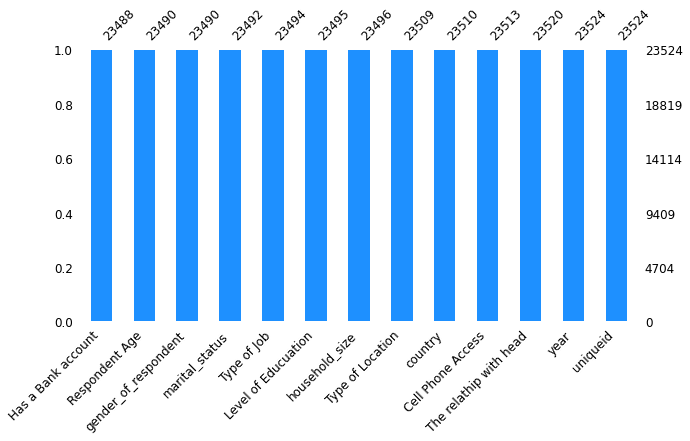

In [6]:
#import the missing number module to help us decide what to do with missing values
import missingno
missingno.bar(fin, figsize=(10,5),sort = 'ascending', color = 'dodgerblue', fontsize=12);

In [7]:
#checcking on the sum of the missing values
print(fin.isnull().sum())
print('')
print('*****************************************')
#percent of missing 
percent_missing = fin.isnull ().sum () * 100 / len (fin) 
print(percent_missing)

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

*****************************************
country                   0.059514
year                      0.000000
uniqueid                  0.000000
Has a Bank account        0.153035
Type of Location          0.063765
Cell Phone Access         0.046761
household_size            0.119027
Respondent Age            0.144533
gender_of_respondent      0.144533
The relathip with head    0.017004
marital_status            0.136031
Level of Educuation       0.123278
Type of Job               0.127529
dtype: float64


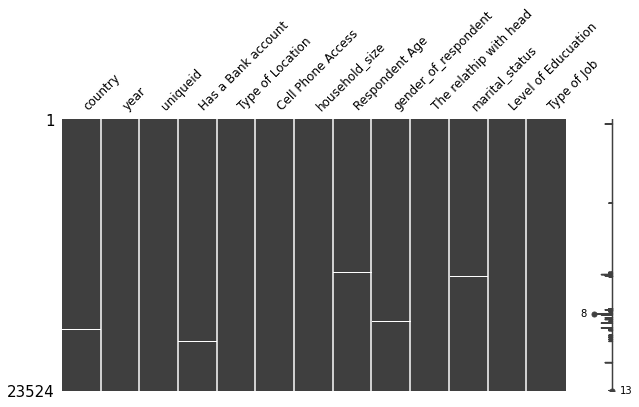

In [8]:
#visualizing the location of the missing values in the data
missingno.matrix(fin,figsize=(10,5), fontsize=12);

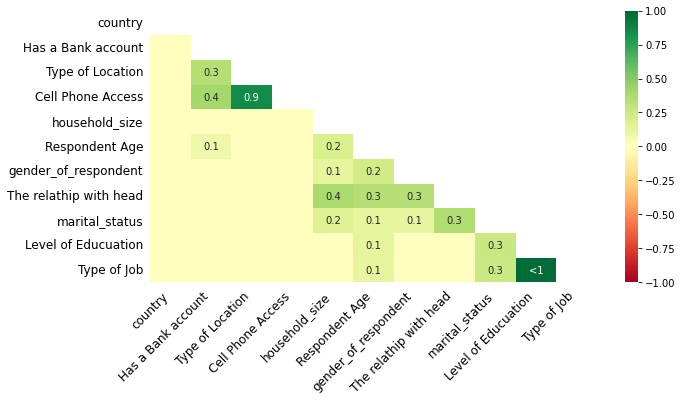

In [9]:
#checcking the nullity correlation of the different columns in the data
missingno.heatmap(fin, cmap="RdYlGn" ,figsize=(10,5), fontsize=12);

The nullity corellation between the type of location and the cell phone access is very high with 0.9 value, this means that if one value in the cell phone access is missing then definitely the other will also be missing.

In [10]:
#dropping the missing values
fin1 = fin.dropna()
fin1.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [11]:
#converting the datatypes of the float to int
fin1['household_size'] = fin1['household_size'].astype(float).astype(int)
fin1['Respondent Age'] = fin1['Respondent Age'].astype(float).astype(int)
fin1.dtypes

country                   object
year                       int64
uniqueid                  object
Has a Bank account        object
Type of Location          object
Cell Phone Access         object
household_size             int64
Respondent Age             int64
gender_of_respondent      object
The relathip with head    object
marital_status            object
Level of Educuation       object
Type of Job               object
dtype: object

In [12]:
#other data cleaning methods 
fin2 =pd.DataFrame(fin1.drop(columns = ['uniqueid']))
fin2

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [13]:
#dropping the values 2029, 2056, 2039
fin2['year'].value_counts()
value = [2029, 2056, 2039]
fin3= fin2[fin2['year'].isin(value) == False]
fin3.shape

(23340, 12)

## 6. Exploratory Analysis

In [14]:
#setting colors for our plots
colors = ['#7FB3D5', '#73C6B6', '#F0B27A', '#C39BD3', '#ABEBC6', '#F4D03F']
#setting the font, figsize and font size globally
plt.rcParams.update({'font.family':'Times New Roman'})
plt.rcParams.update({'font.size':13})
plt.rcParams['figure.figsize'] = [10, 5]

## 1. Univariate analysis

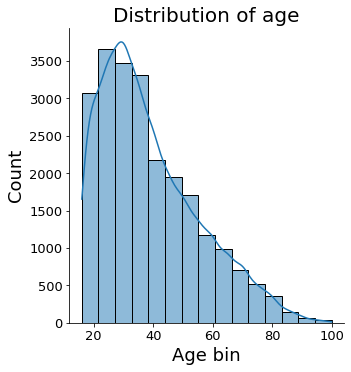

In [15]:
#analysing the numeric variables
fin3n = fin3[['household_size', 'Respondent Age']]
#Analyssing our respondents age
sb.displot(fin3n['Respondent Age'], bins = 15,kde = True)
plt.title('Distribution of age', fontsize = 20)
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Age bin', fontsize = 18)
plt.show()

In [16]:
#the descriptive statistics of the data
pd.DataFrame(fin3n['Respondent Age']).describe()

,Respondent Age
count,23340.000000
mean,38.807069
std,16.519905
min,16.000000
25%,26.000000
50%,35.000000
75%,49.000000
max,100.000000


From the table the minimum age of the respondent is sixteen years while the maximum age of the age is 100 years. The average age of the respondent is 38 years.

In [17]:
#creating a function to trancuate floats
def mytrim(float_number, length):
    if isinstance(float_number, float):
        num =str(float_number)
        digits =num.split(".")
        return_str =float(digits[0] +"." +str(digits[1])[:length])
        return return_str

#checking on the skewness of the data 
from scipy import stats
y = mytrim(stats.skew(fin3n['Respondent Age']), 4)
print('The skewness of the respondents age is ' + str(y))
if y > 0:
    print('\nThe tail on the right side is greater than that on the left side the mean is greater than mode.')
else:
    print('The tail on the left side is greater than that on the right side the mode is greater than teh mean.')

#checking on the Kurtosis 
x = mytrim(stats.kurtosis(fin3n['Respondent Age']), 4)
print('\nThe kurtosis of the data is ' + str(x))
if x == 0:
    print('\nThe data displays a normal distribution the data is mesokurtic.')
elif x > 0:
    print('\nThe data is heavy tailed and has high degree of peakedness the data is leptokurtic.')
else:
    print ('\nThe data is light tailed it has a low degree of peakedness the data is platykurtic.')  

The skewness of the respondents age is 0.8405

The tail on the right side is greater than that on the left side the mean is greater than mode.

The kurtosis of the data is 0.0979

The data is heavy tailed and has high degree of peakedness the data is leptokurtic.


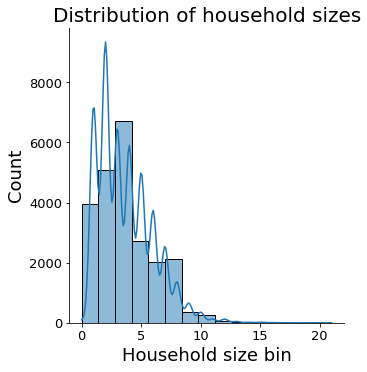

In [18]:
#analysing the household size
sb.displot(fin3n['household_size'], bins = 15,kde = True)
plt.title('Distribution of household sizes', fontsize = 20)
plt.ylabel('Count', fontsize = 18)
plt.xlabel('Household size bin', fontsize = 18);

In [19]:
#the descriptive statistics of the data
pd.DataFrame(fin3n['household_size']).describe()

,household_size
count,23340.000000
mean,3.688560
std,2.281275
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,21.000000


The average household size of the data is 3 people per household the maximum household size is 21 people in the household there are 23,340 respondents in the survey.

In [20]:
#checking on the skewness of the data 
from scipy import stats
y = mytrim(stats.skew(fin3n['household_size']), 4)
print('The skewness of the respondents age is ' + str(y))
if y > 0:
    print('\nThe tail on the right side is greater than that on the left side the mean is greater than mode.')
else:
    print('The tail on the left side is greater than that on the right side the mode is greater than teh mean.')

#checking on the Kurtosis 
x = mytrim(stats.kurtosis(fin3n['household_size']), 4)
print('\nThe kurtosis of the data is ' + str(x))
if x == 0:
    print('\nThe data displays a normal distribution the data is mesokurtic.')
elif x > 0:
    print('\nThe data is heavy tailed and has high degree of peakedness the data is leptokurtic.')
else:
    print ('\nThe data is light tailed it has a low degree of peakedness the data is platykurtic.')  

The skewness of the respondents age is 0.9741

The tail on the right side is greater than that on the left side the mean is greater than mode.

The kurtosis of the data is 1.1533

The data is heavy tailed and has high degree of peakedness the data is leptokurtic.


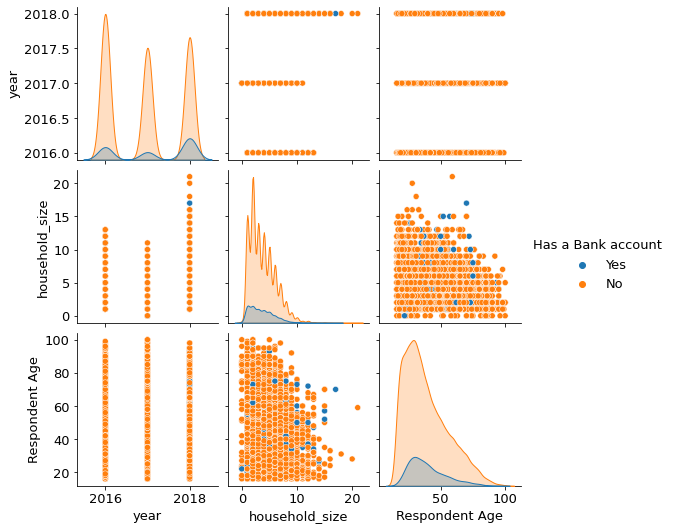

In [21]:
#creating teh pairplot for our numerical variables
sb.pairplot(fin3, hue ='Has a Bank account' )
plt.show()

## Bivariate analysis

In [22]:
#creating a function to add labels to our barplots
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

### 1. Country of respondents and age

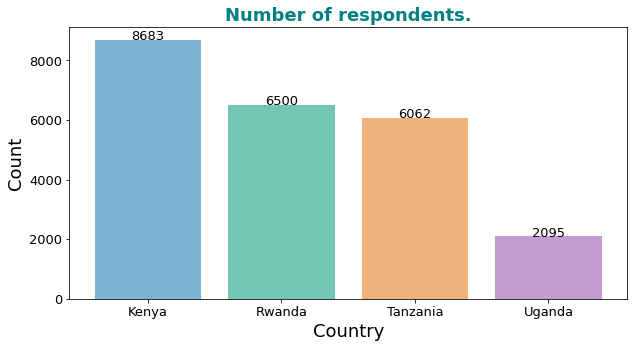

In [23]:
#visualizing the countries total respondents
x = fin3['country'].unique()
y = fin3['country'].value_counts()    
# making the bar chart on the data
plt.bar(x, y, color = colors)
# calling the function to add value labels
addlabels(x, y)     
plt.title('Number of respondents.', fontsize=18, fontweight = 'bold', color = 'teal')
plt.ylabel('Count', fontsize=18)
plt.xlabel('Country', fontsize=18)
plt.show()

In [24]:
#creating a crosstab for the country and individuals with bank account
df = pd.crosstab(fin3['country'], fin3['Has a Bank account'])
df['percent'] = (df.Yes/(df.Yes + df.No)) * 100
df

Has a Bank account,No,Yes,percent
country,,,
Kenya,4543,1519,25.057737
Rwanda,7686,997,11.482207
Tanzania,5901,599,9.215385
Uganda,1914,181,8.639618


In [25]:
#visualizing the percentages 
adf = pd.crosstab(fin3['country'], fin3['Has a Bank account'], margins = True,normalize = True, margins_name = 'Total').style.format('{:.2%}').background_gradient().set_caption('Heatmap of respondents with bank accounts')
adf

Has a Bank account,No,Yes,Total
country,,,
Kenya,19.46%,6.51%,25.97%
Rwanda,32.93%,4.27%,37.20%
Tanzania,25.28%,2.57%,27.85%
Uganda,8.20%,0.78%,8.98%
Total,85.88%,14.12%,100.00%


### 2. Gender of respondents

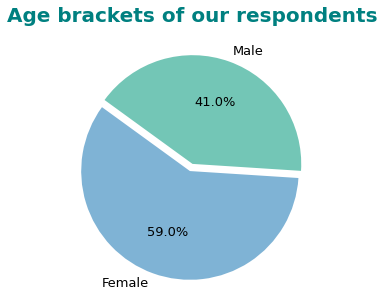

In [26]:
#creating pie chart
fin3['gender_of_respondent'].value_counts().nlargest(10).plot(kind = "pie", startangle = 144 , colors = colors,explode = (0.07,0),autopct = '%1.1f%%')
plt.title('Age brackets of our respondents', fontsize = 20, fontweight = 'bold', color = 'teal')
plt.axis('off')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

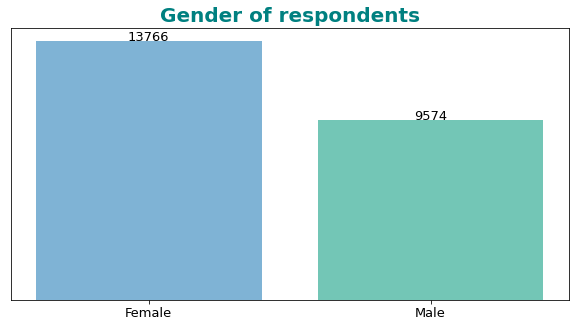

In [27]:
#creating a bar plot
gender = fin3['gender_of_respondent'].unique()
res = fin3['gender_of_respondent'].value_counts()
plt.bar(gender, res, color = colors)
ax = plt.gca()
ax.get_yaxis().set_visible(False)
addlabels(gender, res)
plt.title('Gender of respondents', fontsize = 20, fontweight = 'bold', color = 'teal')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### 3. Education level

In [28]:
#education level and individuals havig bank accounts
df1 = pd.crosstab(fin3['Level of Educuation'], fin3['Has a Bank account'])
df1['percent'] = (df1.Yes/(df1.Yes + df1.No)) * 100
df1.head()

Has a Bank account,No,Yes,percent
Level of Educuation,,,
6,22,5,18.518519
No formal education,4291,176,3.940004
Other/Dont know/RTA,2,6,75.000000
Primary education,11605,1083,8.535624
Secondary education,3225,981,23.323823


In [29]:
#checcking on the percentage
adf = pd.crosstab(fin3['Level of Educuation'], fin3['Has a Bank account'], margins = True,normalize = True, margins_name = 'Total').style.format('{:.2%}').background_gradient().set_caption('Heatmap of respondents with bank accounts')
adf

Has a Bank account,No,Yes,Total
Level of Educuation,,,
6,0.09%,0.02%,0.12%
No formal education,18.38%,0.75%,19.14%
Other/Dont know/RTA,0.01%,0.03%,0.03%
Primary education,49.72%,4.64%,54.36%
Secondary education,13.82%,4.20%,18.02%
Tertiary education,2.37%,2.52%,4.90%
Vocational/Specialised training,1.48%,1.95%,3.43%
Total,85.88%,14.12%,100.00%


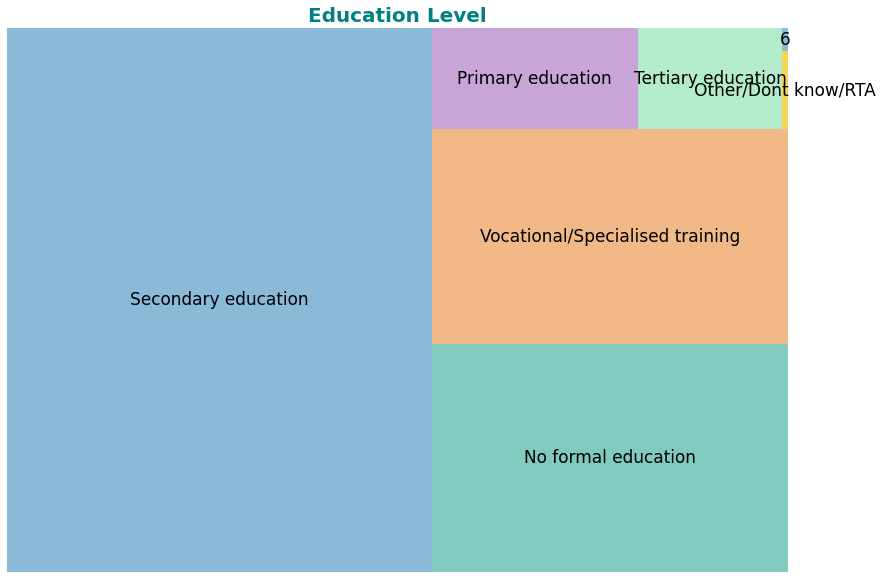

In [30]:
#creating a tree map 
import squarify
count = fin3['Level of Educuation'].value_counts()
ed = fin3['Level of Educuation'].unique()
plt.rc('font', size = 17)
plt.figure(figsize = (14, 10))
squarify.plot(sizes = count, label = ed, color = colors, alpha = 0.9)
plt.axis('off')
plt.title('Education Level', fontsize = 20, fontweight = 'bold', color = 'teal')
plt.show()

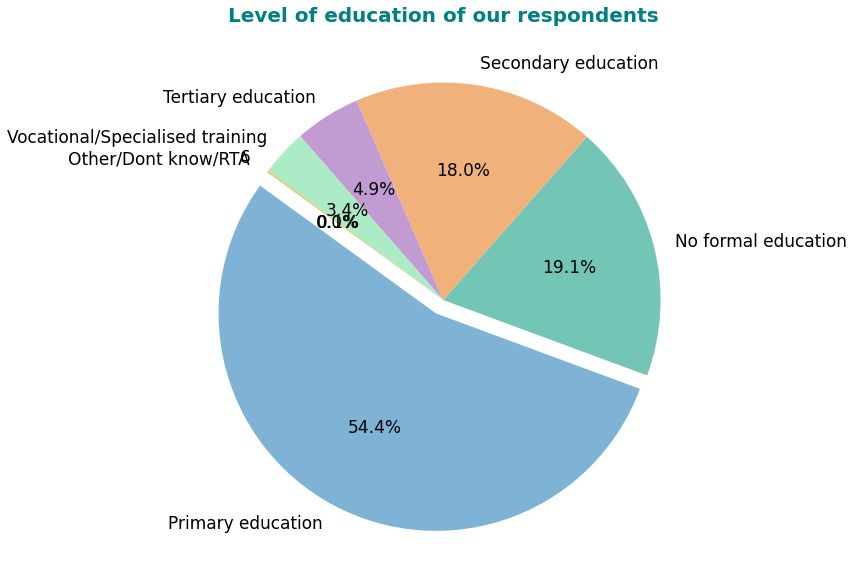

In [31]:
#creating a pie chart
plt.figure(figsize = (14, 10))
fin3['Level of Educuation'].value_counts().nlargest(10).plot(kind = "pie", startangle = 144 , colors = colors,explode = (0.07,0,0,0,0,0,0),autopct = '%1.1f%%')
plt.title('Level of education of our respondents', fontsize = 20, fontweight = 'bold', color = 'teal')
plt.axis('off')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### 4. Type of job of respondent

In [32]:
#creating a cross table to summarize the information
df6 = pd.crosstab(fin3['Type of Job'], fin3['Has a Bank account'])
df6['percent'] = (df6.Yes/(df6.Yes + df6.No)) * 100
df6.head()

Has a Bank account,No,Yes,percent
Type of Job,,,
Dont Know/Refuse to answer,111,14,11.200000
Farming and Fishing,4788,634,11.693102
Formally employed Government,87,299,77.461140
Formally employed Private,481,566,54.059217
Government Dependent,197,50,20.242915


In [33]:
#breaking teh above information down into percentages
adf = pd.crosstab(fin3['Type of Job'], fin3['Has a Bank account'], margins = True,normalize = True, margins_name = 'Total').style.format('{:.2%}').background_gradient().set_caption('Heatmap of respondents with bank accounts')
adf

Has a Bank account,No,Yes,Total
Type of Job,,,
Dont Know/Refuse to answer,0.48%,0.06%,0.54%
Farming and Fishing,20.51%,2.72%,23.23%
Formally employed Government,0.37%,1.28%,1.65%
Formally employed Private,2.06%,2.43%,4.49%
Government Dependent,0.84%,0.21%,1.06%
Informally employed,21.89%,1.89%,23.77%
No Income,2.59%,0.06%,2.65%
Other Income,3.77%,0.84%,4.61%
Remittance Dependent,9.72%,1.03%,10.75%


In [34]:
#checking on the correlation of the numerical variables
fin3n.corr()

,household_size,Respondent Age
household_size,1.000000,-0.119671
Respondent Age,-0.119671,1.000000


y=-0.866602x+(42.003581)


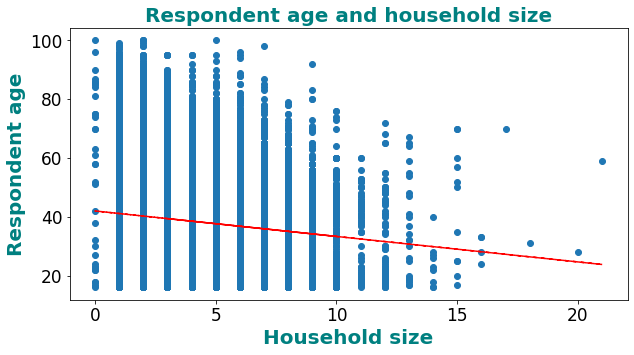

In [35]:
#creating a scatter plot with a trend line
x = fin3n['household_size']
y = fin3n['Respondent Age']
pylab.plot(x,y,'o')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"r--")
# the line equation:
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.xlabel('Household size', fontsize = 20, fontweight = 'bold', color = 'teal')
plt.ylabel('Respondent age', fontsize = 20, fontweight = 'bold', color = 'teal')
plt.title('Respondent age and household size', fontsize = 20, fontweight = 'bold', color = 'teal')
plt.show()

## Feature engineering

We will start feature engineering by first encoding our categorical columns.

#### Categorical encoding.

In [36]:
#checking on the dtypes of our columns
fin3.dtypes

country                   object
year                       int64
Has a Bank account        object
Type of Location          object
Cell Phone Access         object
household_size             int64
Respondent Age             int64
gender_of_respondent      object
The relathip with head    object
marital_status            object
Level of Educuation       object
Type of Job               object
dtype: object

In [37]:
#choosing non-numeric columns only
fin3o = fin3.select_dtypes(include = 'object')
fin3o

,country,Has a Bank account,Type of Location,Cell Phone Access,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...
23519,Uganda,No,Rural,Yes,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,No,Rural,Yes,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,No,Rural,Yes,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,No,Urban,Yes,Female,Parent,Divorced/Seperated,Secondary education,Self employed


We will divide this data further into two categories and we will apply different types of label encoding to this categories

- Ordinal - These are features that can be ranked from our data this include level of education we will apply ordinal encoding here.

- Nominal - These are the variable in our data that do not assume ordering from our data these ionclude all the other features except the level of education we will apply one hot encoder to these features.

In [38]:
#ordinal encoder
ordinal = fin3o[['Level of Educuation']]
ordinal['Level of Educuation'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

we will rank the level of education as follows:
* 0 other/dont know/RTA and 6
* 1 no formal education
* 2 primary education 
* 3 secondary education
* 4 vocational / specialised training
* 5 tertiary education

In [39]:
#transforming
ordinal['Level of Educuation'] = ordinal['Level of Educuation'].replace(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], [3, 1, 4, 2, 5, 0, 0])

In [40]:
#one hot encoder
enc = fin3o.drop(columns = ['Level of Educuation'])

# Get dummies
enc1 = pd.get_dummies(enc, prefix_sep='_', drop_first=True)
# X head
enc1.head()

,country_Rwanda,country_Tanzania,country_Uganda,Has a Bank account_Yes,Type of Location_Urban,Cell Phone Access_Yes,gender_of_respondent_Male,The relathip with head_Head of Household,The relathip with head_Other non-relatives,The relathip with head_Other relative,...,marital_status_Widowed,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Concating all the data

In [41]:
df = pd.concat([fin3n, ordinal, enc1], axis = 1)
df.head()

,household_size,Respondent Age,Level of Educuation,country_Rwanda,country_Tanzania,country_Uganda,Has a Bank account_Yes,Type of Location_Urban,Cell Phone Access_Yes,gender_of_respondent_Male,...,marital_status_Widowed,Type of Job_Farming and Fishing,Type of Job_Formally employed Government,Type of Job_Formally employed Private,Type of Job_Government Dependent,Type of Job_Informally employed,Type of Job_No Income,Type of Job_Other Income,Type of Job_Remittance Dependent,Type of Job_Self employed
0,3,24,3,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5,70,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,5,26,4,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,5,34,2,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,8,26,2,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


#### Class imbalance

When building binary classification models it is important to check on class imbalance since this may affect the model performance.

In [42]:
# Dependent and independent variables
y = df[['Has a Bank account_Yes']]
x = df.drop(columns = ['Has a Bank account_Yes'])

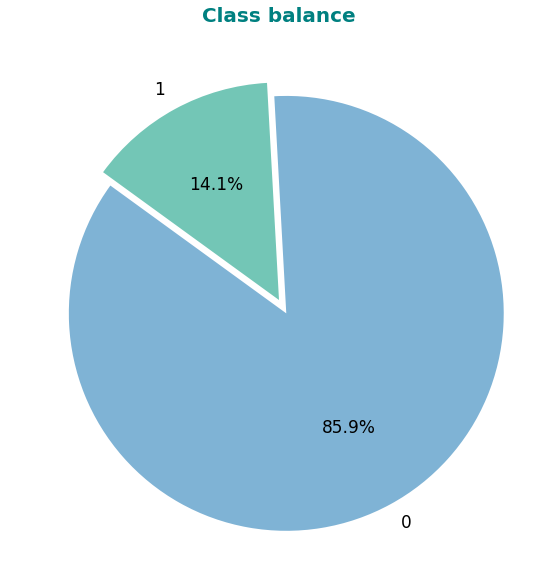

In [43]:
#creating a pie chart
plt.figure(figsize = (14, 10))
y['Has a Bank account_Yes'].value_counts().nlargest(10).plot(kind = "pie", startangle = 144 , colors = colors,explode = (0.07,0),autopct = '%1.1f%%')
plt.title('Class balance', fontsize = 20, fontweight = 'bold', color = 'teal')
plt.axis('off')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

From the above pie chart we see that only 14% of our values are True while the rest are false this is severe class imbalance hence we will have to balance this variable

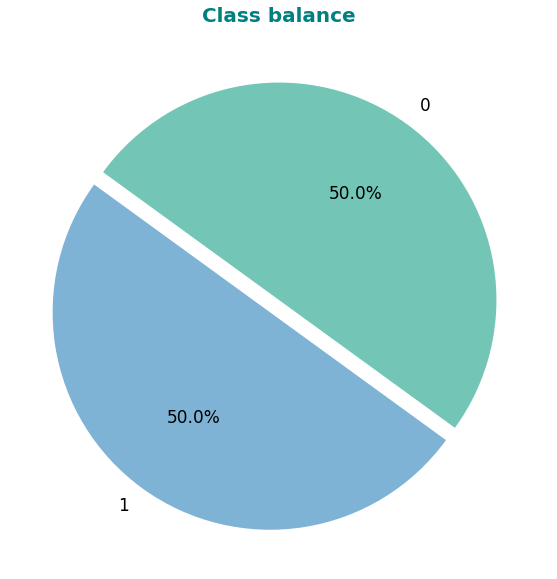

In [44]:
#the dependent feature
xp2 = x.copy()
y2 = y.copy()

from collections import Counter
#checking number of records available in y
j = Counter(y2['Has a Bank account_Yes']).items()
pd.DataFrame(j)

#oversampling
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)
x_res, y_res = ros.fit_resample(xp2, y2)

#creating a pie chart
plt.figure(figsize = (14, 10))
y_res['Has a Bank account_Yes'].value_counts().nlargest(10).plot(kind = "pie", startangle = 144 , colors = colors,explode = (0.07,0),autopct = '%1.1f%%')
plt.title('Class balance', fontsize = 20, fontweight = 'bold', color = 'teal')
plt.axis('off')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

#### Principal compoment analysis 
We will be using PCA as our data reduction technique

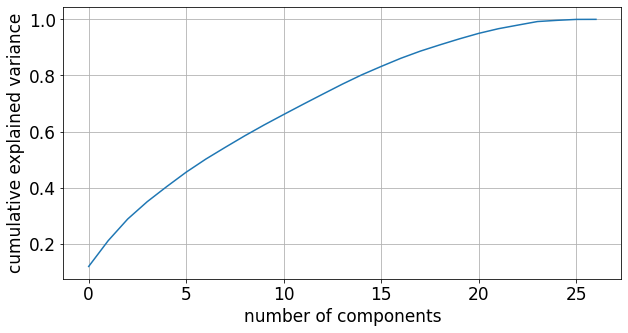

In [45]:
# Dependent and independent variables
y = y_res
x = x_res

#starndard scaler
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
s_x = scale.fit_transform(x)

#applying pca 
from sklearn.decomposition import PCA
pca = PCA()

pca = PCA().fit(s_x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(True);

We will select the number of components that capture atleast 95% of the variance for our data this is at 20

In [46]:
#applying pca with 20 components
pca1 = PCA(n_components = 20)
x_p = pca1.fit_transform(s_x)
x_p.shape

(40088, 20)

## Modelling

Creation of the baseline models will be the frist step towards our journey to accurate prediction, a baseline modle will be a simple model that will be used to evaluate the other modles that we build later.

#### Baseline model.
The first model will be a simple logistic regression model.

In [47]:
#independent variables and dependent variables
x1 = x_p.copy()
y1 = y.copy().values

#train and test set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
model = lg.fit(x_train, y_train)
#predicting
y_pred1 = model.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_test, y_pred1)
print(confusion_matrix2)

from sklearn.metrics import accuracy_score
print('The number of accurately predicted points is: ', accuracy_score(y_test, y_pred1, normalize=False), 'out of: ', len(y_pred1))
print('The accuracy of the model is: ', accuracy_score(y_test, y_pred1).round(7))

[[3108  915]
 [ 988 3007]]
The number of accurately predicted points is:  6115 out of:  8018
The accuracy of the model is:  0.762659


#### Model 2
We will still use logistic regression to build our second modle however we will introduce some best practices when building machine learning models these include hyperparameter optimization and cross validating our model.

In [48]:
#splitting the data
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.2, random_state = 0)

#we will be perfroming hyperparameter optimization using random search cv
from sklearn.model_selection import GridSearchCV as gs
from sklearn.linear_model import LogisticRegression
lrg = LogisticRegression(C=1.0, intercept_scaling=1, dual=False, fit_intercept=True,
          penalty='l2', tol=0.0001)
grid_values = {'penalty': ['l1','l2'], 
               'C': [0.001,0.01,0.1,1,10,100,1000]}
gsv = gs(estimator = lrg, param_grid = grid_values, cv = 5 )
model = gsv.fit(x_train1, y_train1)

#fitting
y_pred2 = model.predict(x_test1)

In [49]:
print('The number of accurately predicted points is: ', accuracy_score(y_test1, y_pred2, normalize=False), 'out of: ', len(y_pred2))
print('The accuracy of the model is: ', accuracy_score(y_test1, y_pred2).round(7))
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred2))

The number of accurately predicted points is:  6115 out of:  8018
The accuracy of the model is:  0.762659
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      4023
           1       0.77      0.75      0.76      3995

    accuracy                           0.76      8018
   macro avg       0.76      0.76      0.76      8018
weighted avg       0.76      0.76      0.76      8018



#### Model 3

Our third model will be based on support vector machines.

In [50]:
#train and test
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.2, random_state = 0)
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'poly', degree = 4, gamma = 'auto')
param_grid = {'C': [1],
              'gamma': [1],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid = param_grid, refit = True, verbose = 3, cv = 5)
grid.fit(x_train1, y_train1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.851 total time= 1.1min
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.850 total time= 1.1min
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.837 total time= 1.1min
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.842 total time= 1.1min
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.839 total time= 1.1min


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1], 'gamma': [1], 'kernel': ['rbf']}, verbose=3)

In [51]:
#predictting
y_pred2 = grid.predict(x_test1)

#### Model evaluation

In [52]:
print('The number of accurately predicted points is: ', accuracy_score(y_test1, y_pred2, normalize=False), 'out of: ', len(y_pred2))
print('The accuracy of the model is: ', accuracy_score(y_test1, y_pred2).round(7))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, y_pred2)
print(cm)
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred2))

The number of accurately predicted points is:  6761 out of:  8018
The accuracy of the model is:  0.8432277
[[3310  713]
 [ 544 3451]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4023
           1       0.83      0.86      0.85      3995

    accuracy                           0.84      8018
   macro avg       0.84      0.84      0.84      8018
weighted avg       0.84      0.84      0.84      8018



Our second model which was based on support vector machines has perfromed way better than the first model which was based on logistic regression from the metric above the model has achieved an accuracy of 84% while the first model achieved an accuracy of 76%.